# Data Science w/Python

# HW5

#### By: Harsh Tandon

<b>Penalties:</b> You will incur penalties if:
<ul>
<li>Your code is wrong</li>
<li>Your code would not work on different data</li>
<li>Your code is unnecessarily slow (you use a for loop, or you use DataFrame.apply unnecessarily, etc)
<li>You answer is composed of more than one output, unless explicitly permitted
</ul>

In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import warnings
warnings.filterwarnings('ignore')

In [2]:
# print all the outputs in a cell
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

# Data Set Description

## USA.gov Data from Bitly

In 2011, URL shortening service Bitly *Bitly.com* partnered with the US goverment website *USA.gov* to provide a feed of anonymous data gathered from users who shorten links ending with *.gov* or *.mil*.  This service is shut down at 2017. 

In this database, each line contains a common form of web data known as **JSON**, which stands for *JavaScript Object Notation* . Python has both built-in and 3rd party libraries for converting a JSON string into a Python dictionary object. Then we can use *pd.DataFrame* convert dictionary object into Dataframe for our analysis.

each line has a number of identifying attributes.

In [18]: records[0] <br>
Out[18]: <br>
{'a': 'Mozilla/5.0 (Windows NT 6.1; WOW64) AppleWebKit/535.11 (KHTML, like Gecko)
Chrome/17.0.963.78 Safari/535.11', <br>
 'al': 'en-US,en;q=0.8', <br>
 'c': 'US',<br>
 'cy': 'Danvers',<br>
 'g': 'A6qOVH',<br>
 'gr': 'MA',<br>
 'h': 'wfLQtf',<br>
 'hc': 1331822918,<br>
 'hh': '1.usa.gov',<br>
 'l': 'orofrog',<br>
 'll': [42.576698, -70.954903],<br>
 'nk': 1,<br>
 'r': 'http://www.facebook.com/l/7AQEFzjSi/1.usa.gov/wfLQtf',<br>
 't': 1331923247,<br>
 'tz': 'America/New_York',<br>
 'u': 'http://www.ncbi.nlm.nih.gov/pubmed/22415991'}<br>
 

In [68]:
import json
file_name = 'bitly_usagov_example.txt'
records = [json.loads(line) for line in open(file_name)]

In [4]:
records[0:2]

[{'a': 'Mozilla/5.0 (Windows NT 6.1; WOW64) AppleWebKit/535.11 (KHTML, like Gecko) Chrome/17.0.963.78 Safari/535.11',
  'c': 'US',
  'nk': 1,
  'tz': 'America/New_York',
  'gr': 'MA',
  'g': 'A6qOVH',
  'h': 'wfLQtf',
  'l': 'orofrog',
  'al': 'en-US,en;q=0.8',
  'hh': '1.usa.gov',
  'r': 'http://www.facebook.com/l/7AQEFzjSi/1.usa.gov/wfLQtf',
  'u': 'http://www.ncbi.nlm.nih.gov/pubmed/22415991',
  't': 1331923247,
  'hc': 1331822918,
  'cy': 'Danvers',
  'll': [42.576698, -70.954903]},
 {'a': 'GoogleMaps/RochesterNY',
  'c': 'US',
  'nk': 0,
  'tz': 'America/Denver',
  'gr': 'UT',
  'g': 'mwszkS',
  'h': 'mwszkS',
  'l': 'bitly',
  'hh': 'j.mp',
  'r': 'http://www.AwareMap.com/',
  'u': 'http://www.monroecounty.gov/etc/911/rss.php',
  't': 1331923249,
  'hc': 1308262393,
  'cy': 'Provo',
  'll': [40.218102, -111.613297]}]

* **a**: info. about browser, device or application used to perform the URL shortening. 
* **c**: country
* **cy**: city
* **gr**: state
* **ll**: longitude and latitude
* **tz**: TimeZone
* **u**: original URL being shorted

## Convert this dictionary *records* into DataFrame. (find out which method to use yourself)

In [69]:
df = pd.DataFrame.from_dict(records)

In [8]:
df.head()

,_heartbeat_,a,al,c,cy,g,gr,h,hc,hh,kw,l,ll,nk,r,t,tz,u
0,NaN,Mozilla/5.0 (Windows NT 6.1; WOW64) AppleWebKi...,"en-US,en;q=0.8",US,Danvers,A6qOVH,MA,wfLQtf,1.331823e+09,1.usa.gov,NaN,orofrog,"[42.576698, -70.954903]",1.0,http://www.facebook.com/l/7AQEFzjSi/1.usa.gov/...,1.331923e+09,America/New_York,http://www.ncbi.nlm.nih.gov/pubmed/22415991
1,NaN,GoogleMaps/RochesterNY,NaN,US,Provo,mwszkS,UT,mwszkS,1.308262e+09,j.mp,NaN,bitly,"[40.218102, -111.613297]",0.0,http://www.AwareMap.com/,1.331923e+09,America/Denver,http://www.monroecounty.gov/etc/911/rss.php
2,NaN,Mozilla/4.0 (compatible; MSIE 8.0; Windows NT ...,en-US,US,Washington,xxr3Qb,DC,xxr3Qb,1.331920e+09,1.usa.gov,NaN,bitly,"[38.9007, -77.043098]",1.0,http://t.co/03elZC4Q,1.331923e+09,America/New_York,http://boxer.senate.gov/en/press/releases/0316...
3,NaN,Mozilla/5.0 (Macintosh; Intel Mac OS X 10_6_8)...,pt-br,BR,Braz,zCaLwp,27,zUtuOu,1.331923e+09,1.usa.gov,NaN,alelex88,"[-23.549999, -46.616699]",0.0,direct,1.331923e+09,America/Sao_Paulo,http://apod.nasa.gov/apod/ap120312.html
4,NaN,Mozilla/5.0 (Windows NT 6.1; WOW64) AppleWebKi...,"en-US,en;q=0.8",US,Shrewsbury,9b6kNl,MA,9b6kNl,1.273672e+09,bit.ly,NaN,bitly,"[42.286499, -71.714699]",0.0,http://www.shrewsbury-ma.gov/selco/,1.331923e+09,America/New_York,http://www.shrewsbury-ma.gov/egov/gallery/1341...


### Q1.1,   How many records are in the Dataframe? (In Camino, pick the right number)

In [9]:
len(df)

3560

### Q1.2,   In column city('cy'), how many records are Nan? (In Camino, pick the right number)

In [10]:
df.cy.isna().sum()

641

### Q1.3,   Exclude Nan, how many different countries this dataset include?  (In Camino, pick the right number)

In [14]:
df[df.c.notna()].c.unique()

array(['US', 'BR', 'PL', 'HK', 'IT', 'ES', 'MY', 'CY', 'GB', 'MT', 'PT',
       'FR', 'DK', 'MX', 'IE', 'BE', 'CA', 'NL', 'CZ', 'SE', 'TH', 'DE',
       'HU', 'JP', 'AT', 'IL', 'PK', 'CO', 'IN', 'MK', 'LB', 'AU', 'CL',
       'SK', 'EG', 'TR', 'RU', 'BG', 'SI', 'FI', 'RO', 'CH', 'PR', 'GR',
       'LV', 'AR', 'AE', 'NO', 'PH', 'VE', 'SA', 'UY', 'KR', 'UA', 'RS',
       'CR', 'PE', 'ID', 'LT', 'NI', 'ZM', 'EC', 'CN', 'JO', 'ZA', 'KN',
       'NZ', 'DO', 'BO', 'MA', 'HN'], dtype=object)

In [15]:
df[df.c.notna()].c.nunique()

71

### Q1.4, Outside of US, what's the top 5 cities use this Bitly service? (In Camino, choose the  city name with the most usage)

In [17]:
df[df.c != 'US'].head()

,_heartbeat_,a,al,c,cy,g,gr,h,hc,hh,kw,l,ll,nk,r,t,tz,u
3,NaN,Mozilla/5.0 (Macintosh; Intel Mac OS X 10_6_8)...,pt-br,BR,Braz,zCaLwp,27,zUtuOu,1.331923e+09,1.usa.gov,NaN,alelex88,"[-23.549999, -46.616699]",0.0,direct,1.331923e+09,America/Sao_Paulo,http://apod.nasa.gov/apod/ap120312.html
6,NaN,Mozilla/5.0 (Windows NT 5.1) AppleWebKit/535.1...,"pl-PL,pl;q=0.8,en-US;q=0.6,en;q=0.4",PL,Luban,wcndER,77,zkpJBR,1.331923e+09,1.usa.gov,NaN,bnjacobs,"[51.116699, 15.2833]",0.0,http://plus.url.google.com/url?sa=z&n=13319232...,1.331923e+09,Europe/Warsaw,http://www.nasa.gov/mission_pages/nustar/main/...
7,NaN,Mozilla/5.0 (Windows NT 6.1; rv:2.0.1) Gecko/2...,"bg,en-us;q=0.7,en;q=0.3",None,NaN,wcndER,NaN,zkpJBR,1.331923e+09,1.usa.gov,NaN,bnjacobs,NaN,0.0,http://www.facebook.com/,1.331923e+09,,http://www.nasa.gov/mission_pages/nustar/main/...
8,NaN,Opera/9.80 (X11; Linux zbov; U; en) Presto/2.1...,"en-US, en",None,NaN,wcndER,NaN,zkpJBR,1.331923e+09,1.usa.gov,NaN,bnjacobs,NaN,0.0,http://www.facebook.com/l.php?u=http%3A%2F%2F1...,1.331923e+09,,http://www.nasa.gov/mission_pages/nustar/main/...
9,NaN,Mozilla/5.0 (Windows NT 6.1; WOW64) AppleWebKi...,"pt-BR,pt;q=0.8,en-US;q=0.6,en;q=0.4",None,NaN,zCaLwp,NaN,zUtuOu,1.331923e+09,1.usa.gov,NaN,alelex88,NaN,0.0,http://t.co/o1Pd0WeV,1.331923e+09,,http://apod.nasa.gov/apod/ap120312.html


In [25]:
df[df.c != 'US'].groupby('cy')['cy'].count().nlargest() #Top 5 cities (not in US) using Bitly service

cy
Nogata    29
London    16
Madrid    13
Mexico    12
SPaulo    11
Name: cy, dtype: int64

## Q2

### Q2.1, How many records are from Russia?  (In Camino, pick the right number)

In [31]:
Ru_records = df[df.c == 'RU'] #subset records from Russia

In [32]:
len(Ru_records) #count of Russian Records

13

### Q2.2, In those records, which city has the highest usage count ?  (In Camino, pick the right city name)

In [33]:
Ru_records.groupby('cy')['cy'].count().idxmax() #City from Russian Records where usage is highest

'Moscow'

### Q2.3, In those records, how many access to cia.gov  (In Camino, pick the right number) 

In [37]:
Ru_records.u.str.contains('cia.gov') #Russian records which has access to cia.gov

498     False
555     False
764      True
777     False
1137    False
1239    False
2637    False
2998    False
3033    False
3117    False
3159    False
3360    False
3463     True
Name: u, dtype: bool

In [39]:
Ru_records.u.str.contains('cia.gov').sum() #count of Russian records which has access to cia.gov

2

## Q3 We are interested in time zones in this data set (the **tz** field). 

### Q3.1, Let's clean the tz field. If it is empty, filled with 'Unknown'. If it is NaN, filled with 'Missing'.  After cleaning, how many tz field are in 'Missing' state and how many are in 'Unknown' state?  (In Camino, fill in these two numbers in the format of 'Missing'/'Unknown'. Don't leave any space in the answer.)

In [70]:
(df.tz == "").sum() #check count where TimeZone cell is empty
df.tz.isna().sum()  #check count where TimeZone is NaN

521

120

In [71]:
df.tz.replace('','Unknown', inplace = True) #replace Empty cells with 'Unknown'
df.fillna('Missing', inplace = True) #fill NA values with 'Missing'

In [72]:
(df.tz == "").sum() #check count where TimeZone cell is empty
df.tz.isna().sum()  #check count where TimeZone is NA

0

0

In [76]:
len(df[df.tz == 'Unknown']) #count where TimeZone is Unknown
len(df[df.tz == 'Missing']) #count where TimeZone is Missing

521

120

### Q3.2, What's the top 10 timezone in this data set? (exclude Unknown and Missing) (In Camino, pick the 10th place timezone)

In [232]:
df_notMissing_notUnknown = df[(df.tz != 'Missing') & (df.tz != 'Unknown')]

In [233]:
df_notMissing_notUnknown.tz.value_counts().head() #check the output of value_counts

America/New_York       1251
America/Chicago         400
America/Los_Angeles     382
America/Denver          191
Europe/London            74
Name: tz, dtype: int64

In [234]:
top10_timezones = df_notMissing_notUnknown.tz.value_counts().reset_index()[:10] #reset the index; choose top 10

In [245]:
top10_timezones.rename({'index':'tz','tz':'Count'}, axis=1, inplace=True) #rename column names

In [246]:
top10_timezones

,tz,Count
0,America/New_York,1251
1,America/Chicago,400
2,America/Los_Angeles,382
3,America/Denver,191
4,Europe/London,74
5,Asia/Tokyo,37
6,Pacific/Honolulu,36
7,Europe/Madrid,35
8,America/Sao_Paulo,33
9,Europe/Berlin,28


### Q3.3 Use seaborn package to make a horizontal bar plot based on previous question. (Use tz as Y-axis).  (In Camino, select the cities in the first 3 timezone, multiple choices)

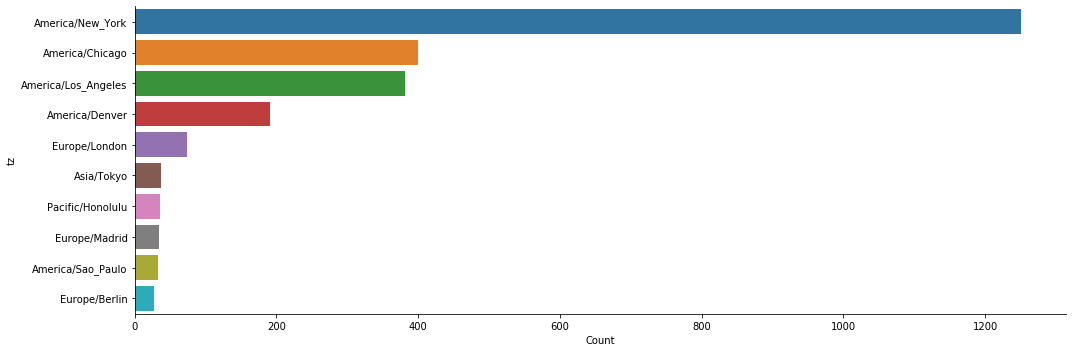

In [247]:
sns.catplot(y='tz', x='Count',data=top10_timezones, kind='bar', aspect = 3)

### Q3.4,  If based on 'c' field (Country) and the 'America' keyword in 'tz' field, count how many records are from US ? (In Camino, fill in those two count numbers in format of count_by_c/count_by_tz. Don't leave any space in the answer.)

In [261]:
len(df[df.c == 'US']) #count where Country = US
len(df[df.tz.str.contains('America')]) #Count where TimeZone contains America

2305

2412

### Q3.5,  Based on last question,  is both counts match ? If not, find out how many records are timezone with 'America' keyword but Country not in US? (In Camino, select the correct number)

In [262]:
len(df[(df.tz.str.contains('America')) & (df.c != 'US')]) #tz contains America but Country not in US

143